
# Project: Investigate a Dataset - No-show appointments

[(original source on Kaggle)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this Analysis I'll go inside the dataset for the for Hospitals patient appointment to explore the available date to answer the below questions


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Which Neighbourhood the most impacted by the previous factors?

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 

In [2]:
#Dataloading
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


below actions needed to clean the data
    
    The AppointmentID is identifier not needed and can be dropped 
    
    There is no missing data but in there is 1 row with age -1 this can be dropped 
    
    The scholarship column will be renamed to BrasilianWelfare to be more descriptive 
    
    The PatientId will be kept so we can observe if any appointment booked for the same patient in the same time this will indicate duplicate record 
    
    PatientId data type to be changed to int
    
    Rename No-show column to No_show
    
    Convert the ScheduledDay and AppointmentDay to dates
    
    ScheduledDay can't be after AppointmentDay such records to be dropped
    
    The waiting day between the ScheduledDay till the AppointmentDay will be calculated in Days 


### Data Cleaning

 

In [4]:
# drop the appointment ID
df.drop(['AppointmentID'],axis=1, inplace=True)

# drop the Age < 0
df.drop(df[df.Age <0].index,inplace=True)





In [5]:
#rename Scholarship column to BrasilianWelfare
df.rename({'Scholarship':'BrasilianWelfare'}, axis=1,inplace=True)

#change the PatientId from float to int
df['PatientId']=df.PatientId.astype('int64')


In [6]:
#Check the duplicate values 
df.duplicated().sum()

618

In [7]:
#Drop the duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
#rename No-show column to No_show
df.rename({'No-show':'No_show'}, axis=1,inplace=True)

In [9]:
#convert the ScheduledDay and AppointmentDay to dates
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)

#Calculate the waiting Days 
df['WaitingDays']=(df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days

# Drop the rows if the waiting day in negative value
#which means the AppointmentDay comes before ScheduledDay
df.drop(df[df.WaitingDays < 0].index,inplace=True)
df.describe()

,PatientId,Age,BrasilianWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
count,1.099030e+05,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000,109903.000000
mean,1.474520e+14,37.086986,0.098287,0.197247,0.071818,0.030427,0.022110,0.322848,10.156966
std,2.560400e+14,23.121169,0.297703,0.397922,0.258187,0.171759,0.160816,0.467567,15.250971
min,3.921700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172982e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


## Exploratory Data Analysis




### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [10]:
#let explore histograms and the no-show values distrubted butween the diffrent columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109903 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientId         109903 non-null  int64              
 1   Gender            109903 non-null  object             
 2   ScheduledDay      109903 non-null  datetime64[ns, UTC]
 3   AppointmentDay    109903 non-null  datetime64[ns, UTC]
 4   Age               109903 non-null  int64              
 5   Neighbourhood     109903 non-null  object             
 6   BrasilianWelfare  109903 non-null  int64              
 7   Hipertension      109903 non-null  int64              
 8   Diabetes          109903 non-null  int64              
 9   Alcoholism        109903 non-null  int64              
 10  Handcap           109903 non-null  int64              
 11  SMS_received      109903 non-null  int64              
 12  No_show           109903 non-null  object   

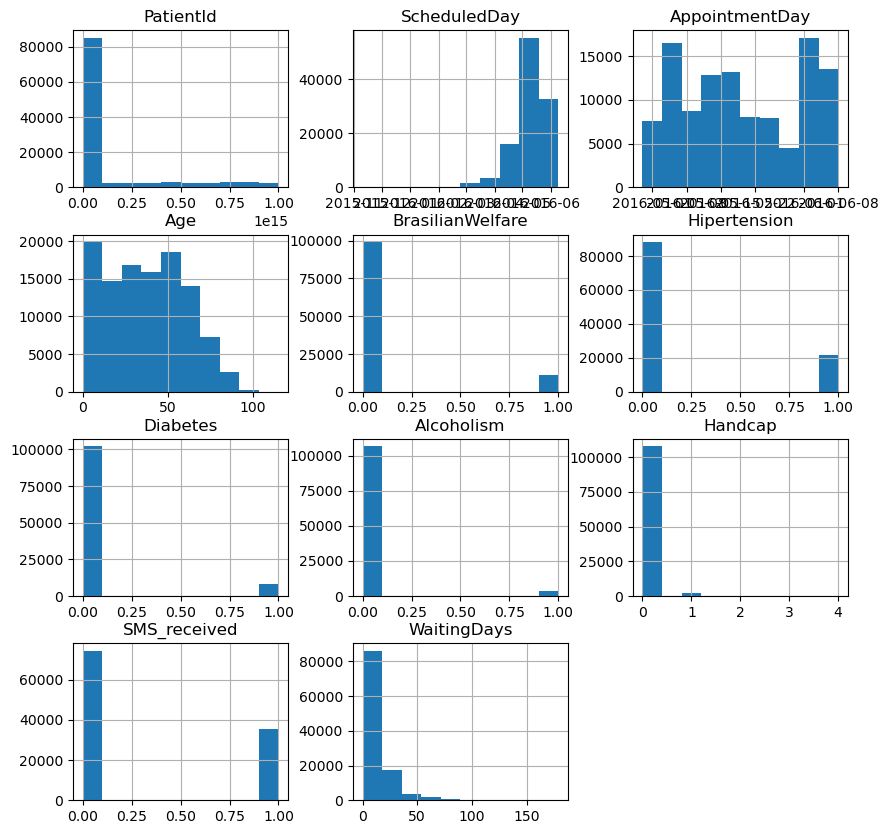

In [11]:
#Exploring the df histogram
df.hist(figsize=(10,10));
 

In [12]:
#groupby no-show values distrubtion between the diffrent columns
print(df.groupby('No_show').Gender.value_counts())
print(df.groupby('No_show').Age.mean())
print(df.groupby('No_show').BrasilianWelfare.value_counts())
print(df.groupby('No_show').Hipertension.value_counts())
print(df.groupby('No_show').Diabetes.value_counts())

No_show  Gender
No       F         56965
         M         30838
Yes      F         14455
         M          7645
Name: Gender, dtype: int64
No_show
No     37.793116
Yes    34.281538
Name: Age, dtype: float64
No_show  BrasilianWelfare
No       0                   79558
         1                    8245
Yes      0                   19543
         1                    2557
Name: BrasilianWelfare, dtype: int64
No_show  Hipertension
No       0               69855
         1               17948
Yes      0               18370
         1                3730
Name: Hipertension, dtype: int64
No_show  Diabetes
No       0           81332
         1            6471
Yes      0           20678
         1            1422
Name: Diabetes, dtype: int64


In [13]:
#groupby no-show values distrubtion between the diffrent columns
print(df.groupby('No_show').Alcoholism.value_counts())
print(df.groupby('No_show').Handcap.value_counts())
print(df.groupby('No_show').SMS_received.value_counts())
print(df.groupby('No_show').WaitingDays.mean())

No_show  Alcoholism
No       0             85127
         1              2676
Yes      0             21432
         1               668
Name: Alcoholism, dtype: int64
No_show  Handcap
No       0          85983
         1           1665
         2            145
         3              8
         4              2
Yes      0          21703
         1            356
         2             37
         3              3
         4              1
Name: Handcap, dtype: int64
No_show  SMS_received
No       0               62105
         1               25698
Yes      0               12316
         1                9784
Name: SMS_received, dtype: int64
No_show
No      8.733938
Yes    15.810633
Name: WaitingDays, dtype: float64


### The output shows that the the number of Patients with No_show = Yes had avarege waitingDays 15.8 days before they can attend while for the petient at was able to attend the avarage waiting days around 8.7 days

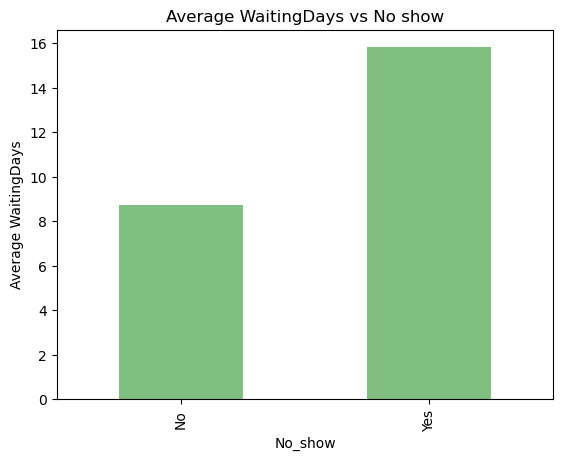

In [14]:
#The output shows that the the number of Patients with No_show = Yes had 
#avarege waitingDays 15.7 days before they can attend, below plot show that on visual way
df.groupby('No_show').WaitingDays.mean().plot(kind='bar',alpha=0.5, color= 'green', label='WaitingDays');
plt.title('Average WaitingDays vs No show')
plt.ylabel('Average WaitingDays');




### the below function will plot the Histogram with the below inputs
y_axis is Pandas DF

x_axis is the column lable

needed_lable is the lable to be shown on the 

plot_color 

In [15]:
def plot_hist(y_axis=df.query('No_show == "Yes"'),x_axis='WaitingDays',needed_lable='No show',plot_color='green'):
    y_axis[x_axis].plot(kind='hist',bins=50,grid=True,label=needed_lable,color=plot_color)
    plt.legend()
    plt.xlabel(x_axis)
    plt.ylabel('Frequency')
    plt.title('Histogram {} for {} patients'.format(x_axis,needed_lable))


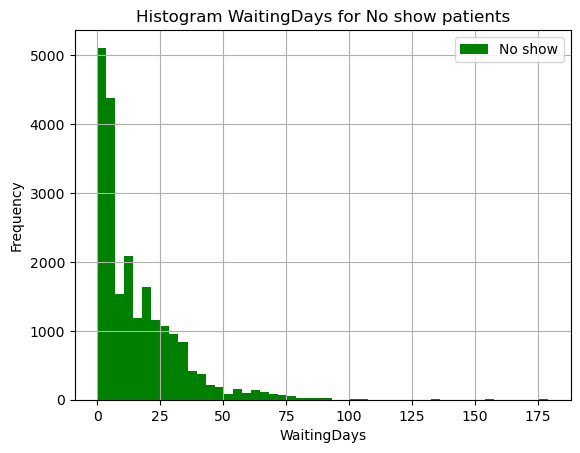

In [16]:
#Histogram WaitingDays for No Show patients function default values

plot_hist()

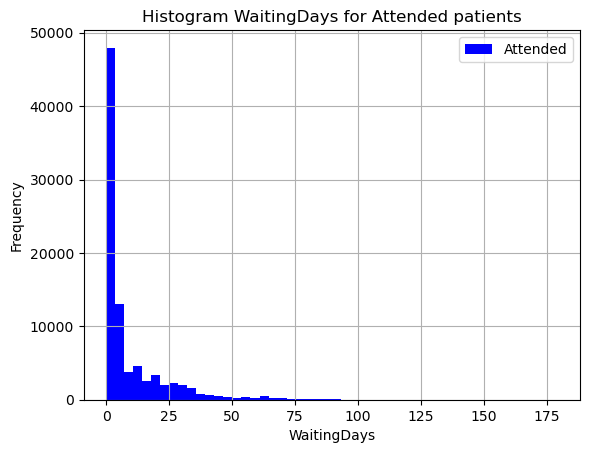

In [25]:
#Histogram WaitingDays for attended patients
plot_hist(df.query('No_show == "No"'),'WaitingDays','Attended','blue')

### the Above Histograms show as the Waiting days increase the propability for the pateint to not attende increase as well and the histgrame become more spreaded 

In [18]:
#export the dataset
df.to_csv('noshowappointments-kagglev2-may-2016_v1.csv',index=False)

### Research Question 2:  high WaitingDays indicating that the Hospital is surving high volume of patients how is the Nieboorhoods is impacted by that Waiting time lets explore that

In [19]:
#let collect the No_show data sets only 
df_no_show=df[df['No_show']=="Yes"].copy()
df_no_show.info()
df_no_show.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22100 entries, 6 to 110516
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   PatientId         22100 non-null  int64              
 1   Gender            22100 non-null  object             
 2   ScheduledDay      22100 non-null  datetime64[ns, UTC]
 3   AppointmentDay    22100 non-null  datetime64[ns, UTC]
 4   Age               22100 non-null  int64              
 5   Neighbourhood     22100 non-null  object             
 6   BrasilianWelfare  22100 non-null  int64              
 7   Hipertension      22100 non-null  int64              
 8   Diabetes          22100 non-null  int64              
 9   Alcoholism        22100 non-null  int64              
 10  Handcap           22100 non-null  int64              
 11  SMS_received      22100 non-null  int64              
 12  No_show           22100 non-null  object             
 13  

,PatientId,Age,BrasilianWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
count,2.210000e+04,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000,22100.000000
mean,1.463629e+14,34.281538,0.115701,0.168778,0.064344,0.030226,0.020045,0.442715,15.810633
std,2.545683e+14,21.965224,0.319874,0.374564,0.245370,0.171213,0.156046,0.496719,16.612104
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,3.152947e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,9.453537e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [20]:
#drop the No_show columns as it is not needed
df_no_show.drop(['No_show'],axis=1,inplace=True)
df_no_show.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,BrasilianWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays
6,733688164476661,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,2
7,3449833394123,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,2
11,7542951368435,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,3
17,14794966191172,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1
20,622257462899397,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,2


In [21]:
#collect the number of Neighbourhood
df_no_show['Neighbourhood'].unique().shape

(80,)

### in this Dataset we have 80 neighbourhood that contribuite in the No show analysis 

In [22]:
#Extract from those 80 Neighbourhoods the ones that the mean WaitingDays >= 15.810633
# 15.810633 is the whole no_show mean calculated in Q1
df_no_show.groupby('Neighbourhood')['WaitingDays'].describe().query('mean >= 15.810633').sort_values(by='mean',ascending=False)


,count,mean,std,min,25%,50%,75%,max
Neighbourhood,,,,,,,,
SANTA CECÍLIA,123.0,34.861789,41.996550,0.0,9.50,23.0,35.00,176.0
ILHAS OCEÂNICAS DE TRINDADE,2.0,29.000000,0.000000,29.0,29.00,29.0,29.00,29.0
NAZARETH,29.0,28.758621,17.346583,2.0,11.00,30.0,41.00,58.0
JARDIM CAMBURI,1429.0,27.569629,27.814717,0.0,2.00,12.0,55.00,110.0
FONTE GRANDE,147.0,25.748299,25.405976,0.0,5.00,18.0,29.50,76.0
MARUÍPE,420.0,23.930952,28.424963,0.0,5.00,19.0,33.25,179.0
JUCUTUQUARA,133.0,23.293233,19.018644,0.0,5.00,21.0,37.00,61.0
RESISTÊNCIA,884.0,22.402715,20.989687,0.0,5.00,16.0,35.00,103.0
FRADINHOS,48.0,21.750000,18.857246,0.0,7.00,14.0,35.25,67.0


### the Above table shows that out of 80 Neighbourhood we have 28 Neibourhood the avarage time for Waiting Days is higher than the whole Avarage WatingDays
### also it provide an indication of how much contribution the neighbourhood impact the Waiting time and it show number of Appointment  

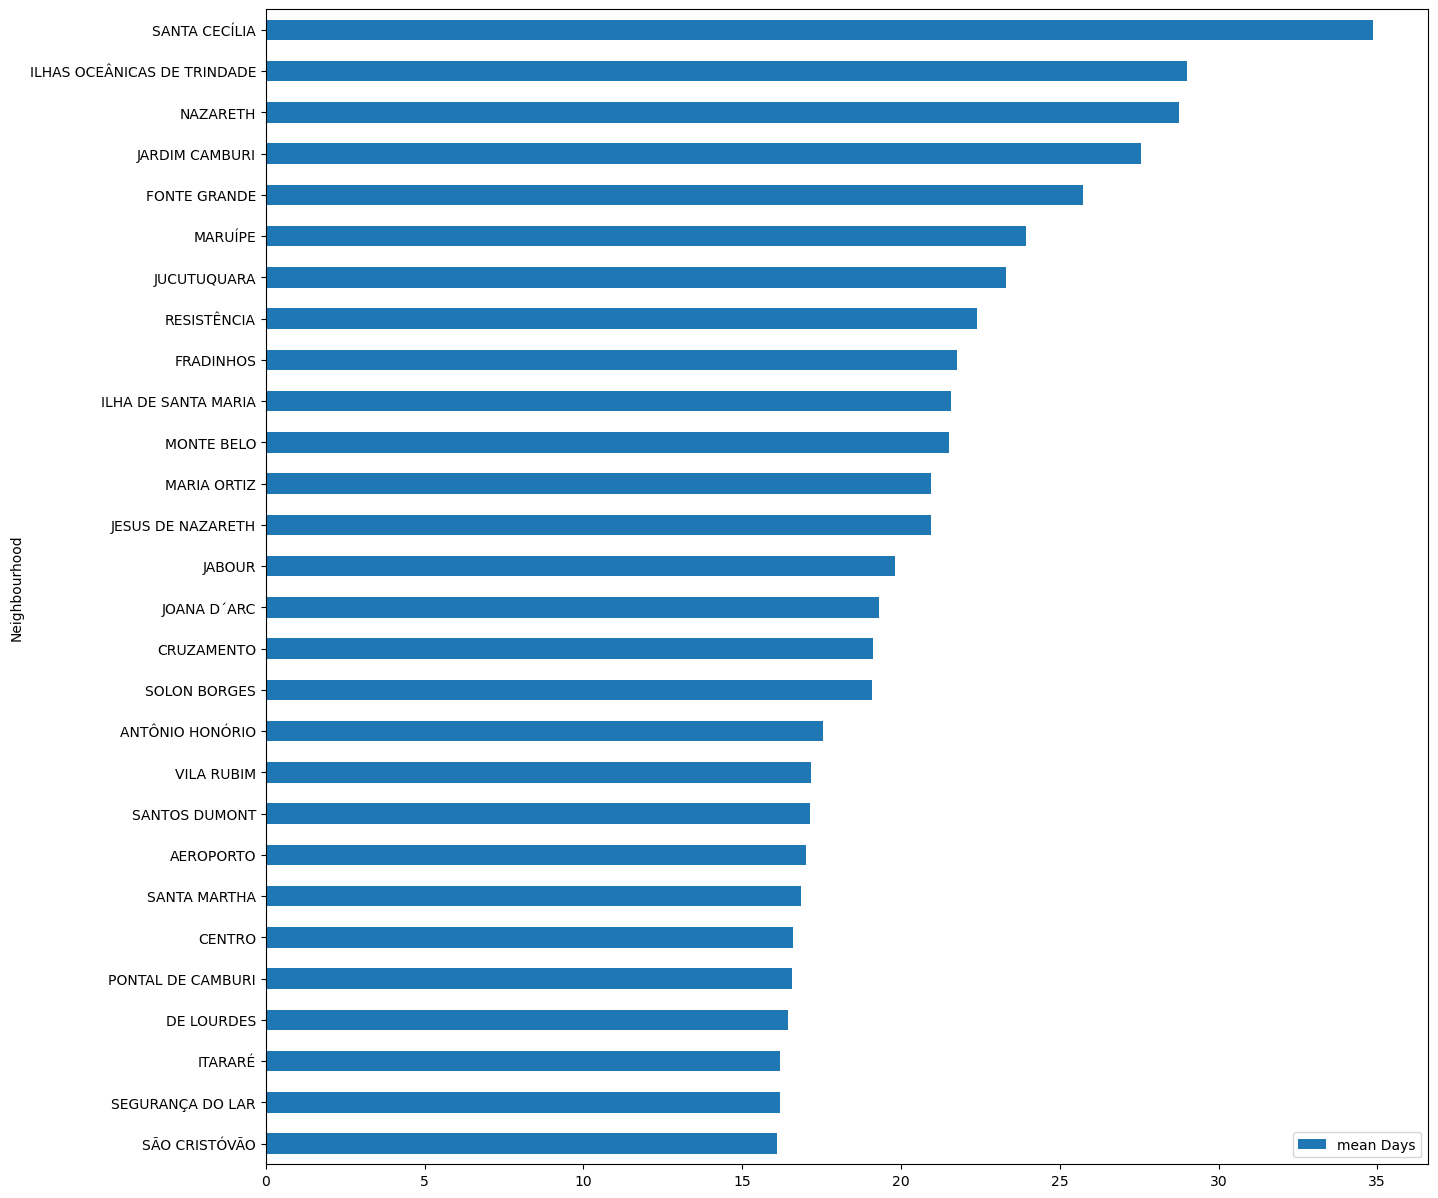

In [23]:
#On the horizontal bar chart we can see on the top the most impacted Neighbourhood 
df_no_show.groupby('Neighbourhood')['WaitingDays'].describe().query('mean >= 15.810633').sort_values(by='mean',ascending=True)['mean'].plot(kind='barh',label='mean Days',figsize=(15,15));
plt.legend()

### the Graph is giving ranking for each neighbourhood about the cntribution along with the table they can be a strt point for another study to help finding the reason behind such huge wating days for appointment 
### more data woulbe needed from each neighbourhood to start figure out how this wating time can be enhanced 

<a id='conclusions'></a>
## Conclusions

From the above analysis it was observed the that the main controbutor for the Pateint not shown on the there appointment in the lon queue and waiting days between ScheduledDay and AppointmentDay with an avarage 15.7 days whaich can lead that people either forget their Appointment or the sysmptoms disapeared
even sending sms doen't help.

To see how the Neighbourhood impacted by that waiting time the dataset for the No-show apoinintment analysed and explored and it was observed that 28 neighbourhood out 80 have avarage waiting days higher than the overall (15.7 Days)

Additional research need to address the reason for the long waiting time, also the pateints  distribution between the hospitals 


Limitation faced in the Dataset for 1 entry of the Age was -1 and it was dropped 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295